In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge


In [2]:
dt = pd.read_csv('../../data/processed_data_1.csv')
print(dt.head())

   bhk  type  locality  area  region  status  age  price_in_USD
0    3     0      3019   685       8       0    0      300000.0
1    2     0      4965   640     124       1    0       63012.0
2    2     0      7031   610      31       1    0      207600.0
3    2     0      8484   876     140       1    0       71976.0
4    2     0      4288   659     117       1    0      112932.0


In [3]:
print(dt.shape)

(76038, 8)


In [4]:
print(dt.head())

   bhk  type  locality  area  region  status  age  price_in_USD
0    3     0      3019   685       8       0    0      300000.0
1    2     0      4965   640     124       1    0       63012.0
2    2     0      7031   610      31       1    0      207600.0
3    2     0      8484   876     140       1    0       71976.0
4    2     0      4288   659     117       1    0      112932.0


In [5]:
X = dt.drop(['price_in_USD'], axis = 'columns')
Y = dt.price_in_USD


In [6]:
print(Y.shape)

(76038,)


In [7]:
from sklearn.linear_model import LassoCV, Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
X_k, X_val, Y_k, Y_val = train_test_split(X, Y, test_size=0.3, random_state=10)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val = scaler.transform(X_val)

reg_lasso_cv = LassoCV(cv=5, random_state=0).fit(X_train_scaled, Y_train)

# In ra alpha tốt nhất
print(f"Best alpha: {reg_lasso_cv.alpha_}")



Best alpha: 196.03648624763562


In [8]:
print(X_train_scaled.shape)
print(Y_train.shape)

(60830, 7)
(60830,)


R-squared on the test set: 0.599117513425174
Training scores:
 [[0.56130993 0.57202306 0.57202306 0.57202306]
 [0.58887933 0.56351926 0.56351926 0.56351926]
 [0.61481739 0.57203157 0.57203157 0.57203157]
 [0.61690605 0.58636203 0.57403298 0.57403298]
 [0.61708734 0.59281537 0.57854172 0.57854172]
 [0.61173312 0.5913041  0.58991857 0.58991857]
 [0.60620118 0.58851584 0.59010348 0.59435375]
 [0.60572802 0.59037964 0.59152241 0.5991482 ]
 [0.60348729 0.58958129 0.59084313 0.59927351]
 [0.60380225 0.59114288 0.59249933 0.59730761]]
Cross-validation scores:
 [[0.5703999  0.60872358 0.60422844 0.58961261]
 [0.57176645 0.60983294 0.60546716 0.59255177]
 [0.57196756 0.60998992 0.60510544 0.59317078]
 [0.57190417 0.61029294 0.60602439 0.59277314]
 [0.57162151 0.61038728 0.6055411  0.59306837]
 [0.57193476 0.61041323 0.60585285 0.59277509]
 [0.57173551 0.61052152 0.60571036 0.59268339]
 [0.57107229 0.61043928 0.60655262 0.59178884]
 [0.57197541 0.61049224 0.60592657 0.59186634]
 [0.572468   0.61

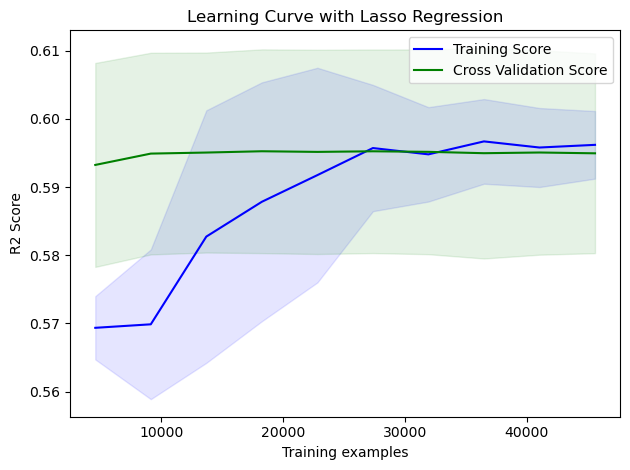

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler

# Assuming X_train_scaled, X_test_scaled, Y_train, Y_test are already defined

# Initialize the Lasso model with the best alpha value
reg_lasso = Lasso(alpha=reg_lasso_cv.alpha_)
reg_lasso.fit(X_train_scaled, Y_train)

# Evaluate the model on the test set
score = reg_lasso.score(X_test_scaled, Y_test)
print("R-squared on the test set:", score)

# Calculate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    reg_lasso, X_train_scaled, Y_train, cv=4, train_sizes=np.linspace(0.1, 1.0, 10), scoring="r2"
)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Print the training scores and cross-validation scores
print("Training scores:\n", train_scores)
print("Cross-validation scores:\n", val_scores)

# Print the mean and standard deviation of training and cross-validation scores
print("Mean training scores:\n", train_scores_mean)
print("Mean cross-validation scores:\n", val_scores_mean)

# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, label="Training Score", color='b')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='b', alpha=0.1)
plt.plot(train_sizes, val_scores_mean, label="Cross Validation Score", color='g')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, color='g', alpha=0.1)

# Adding titles and labels
plt.title("Learning Curve with Lasso Regression")
plt.xlabel("Training examples")
plt.ylabel("R2 Score")
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [10]:
# Khởi tạo mô hình Lasso với alpha tốt nhất
reg_lasso = Lasso(alpha=reg_lasso_cv.alpha_)
reg_lasso.fit(X_train_scaled, Y_train)

# Đánh giá mô hình trên tập kiểm tra
score = reg_lasso.score(X_test_scaled, Y_test)
print("R-squared on the test set:", score)


R-squared on the test set: 0.599117513425174


In [11]:
score2 = reg_lasso.score(X_train_scaled, Y_train)
print("R-squared on the train set:", score2)

R-squared on the train set: 0.5961647871118836


In [12]:
Y_pred = reg_lasso.predict(X_test_scaled)

In [13]:
pred_table = pd.DataFrame(data={"actual value":Y_test, "predicted":Y_pred})
pred_table["difference"] = pred_table["actual value"] - pred_table["predicted"]
pred_table

,actual value,predicted,difference
7625,198000.0,255210.904246,-57210.904246
75492,90000.0,196628.318758,-106628.318758
66504,39600.0,60496.634593,-20896.634593
52577,120000.0,167643.594573,-47643.594573
38830,612000.0,316755.726683,295244.273317
...,...,...,...
7596,226800.0,295736.871253,-68936.871253
15640,113496.0,248879.127248,-135383.127248
6955,74400.0,226393.610863,-151993.610863
62566,210000.0,325684.002418,-115684.002418


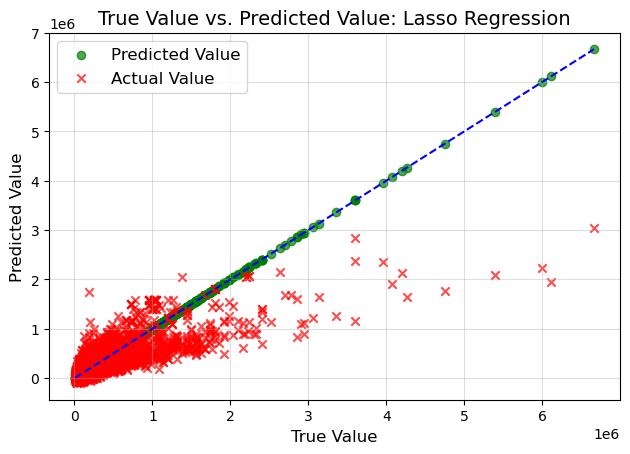

In [14]:
# Scatter plot for Y_test (green)
plt.scatter(Y_test, Y_test, c='green', marker='o', label='Predicted Value', alpha=0.7)

# Scatter plot for Y_pred (red)
plt.scatter(Y_test, Y_pred, c='red', marker='x', label='Actual Value', alpha=0.7)

# Add labels and title
plt.xlabel("True Value", fontsize=12)
plt.ylabel("Predicted Value", fontsize=12)
plt.title("True Value vs. Predicted Value: Lasso Regression", fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Add a diagonal line (perfect prediction line)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='blue')

# Grid for better readability
plt.grid(alpha=0.4)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()


In [15]:
score = reg_lasso.score(X_val, Y_val)
print("R-squared on the validation set:", score)

R-squared on the validation set: 0.5870171457846884
